# Assignment 4
## Part 1

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose
from keras.utils import np_utils
import numpy as np
from tensorflow.keras import layers
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
def noise(array):
 noise_factor = 0.4
 noisy_array = array + noise_factor * np.random.normal(
 loc=0.0, scale=1.0, size=array.shape)
 return np.clip(noisy_array, 0.0, 1.0)

## Noise and Normalize

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

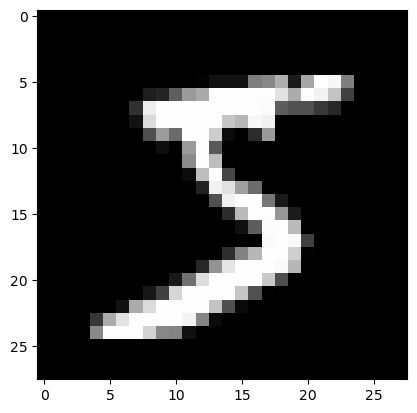

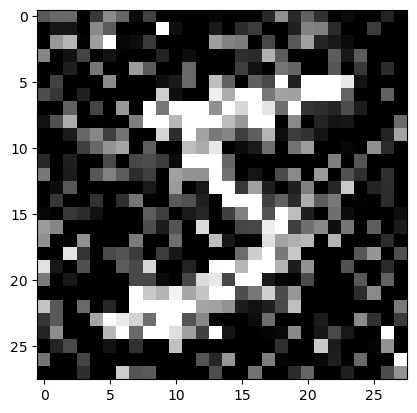

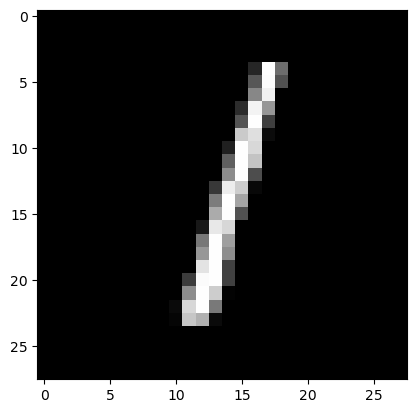

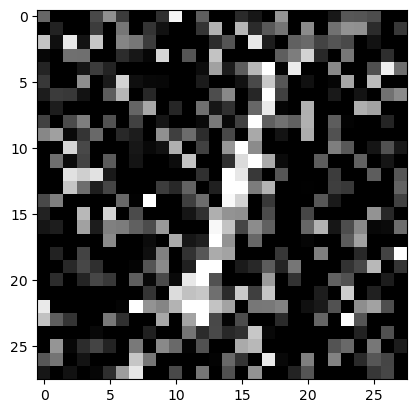

In [5]:
%matplotlib inline
plt.gray()
imgplot = plt.imshow(X_train[0,:,:])
plt.show()
imgplot = plt.imshow(noisy_X_train[0,:,:])
plt.show()
imgplot = plt.imshow(X_test[2,:,:])
plt.show()
imgplot = plt.imshow(noisy_X_test[2,:,:])
plt.show()

# Define Model

In [6]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Convolution2D(1, (3, 3), activation="sigmoid", padding="same"))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],
              optimizer='adam')

# Fit and Predict

In [7]:
model.fit(noisy_X_train, X_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 19s 41ms/step - loss: 0.1826 - accuracy: 0.8081
Epoch 2/5
469/469 [==============================] - 19s 41ms/step - loss: 0.1015 - accuracy: 0.8128
Epoch 3/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0973 - accuracy: 0.8134
Epoch 4/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0950 - accuracy: 0.8137
Epoch 5/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0934 - accuracy: 0.8138


In [8]:
X_predict = model.predict(noisy_X_test)

313/313 [==============================] - 1s 3ms/step


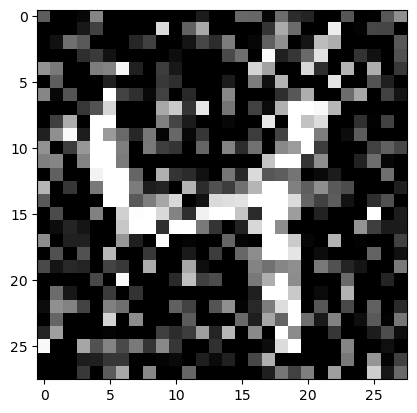

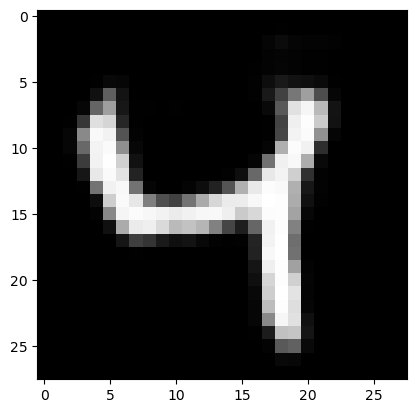

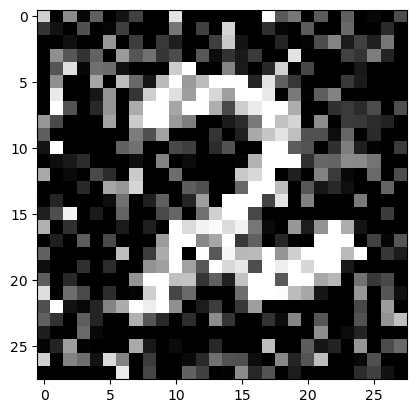

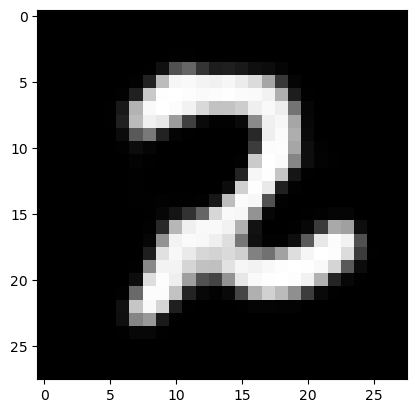

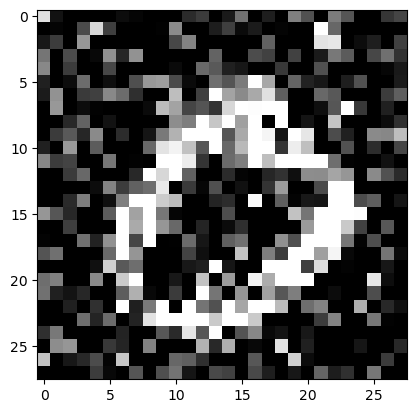

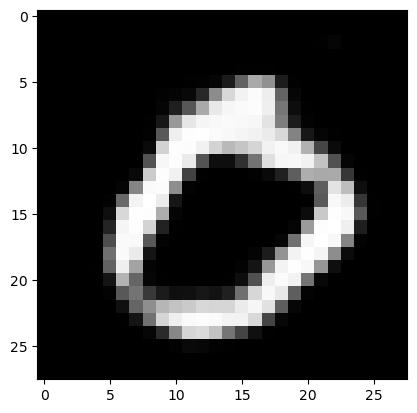

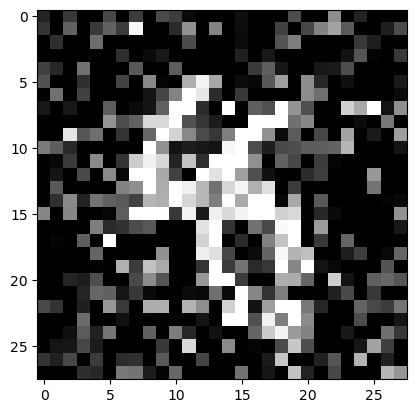

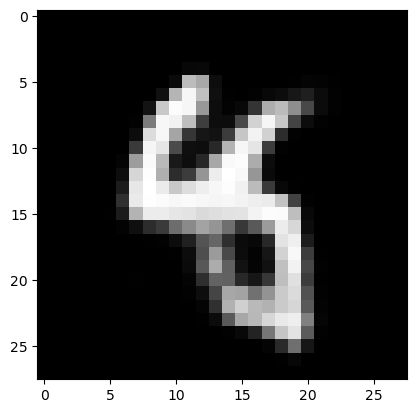

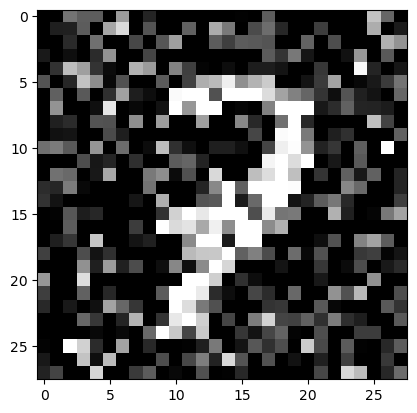

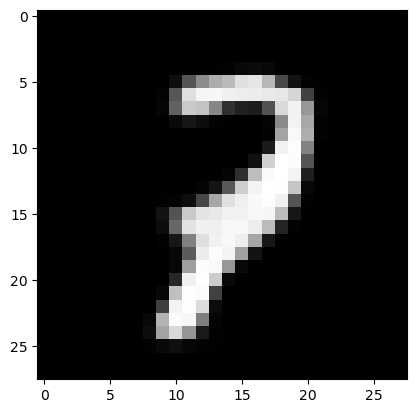

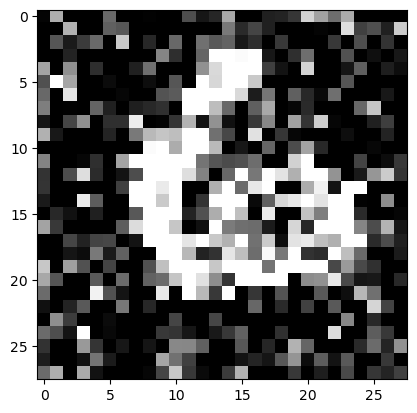

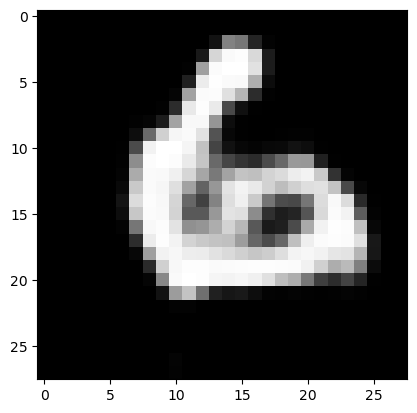

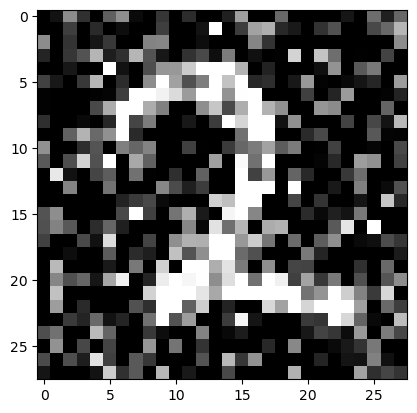

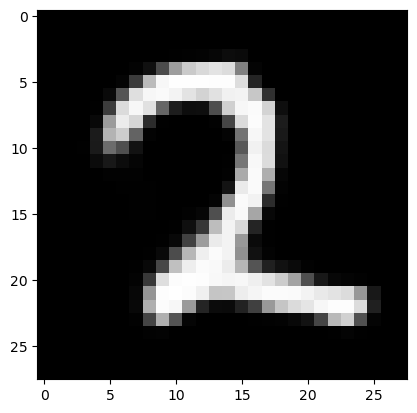

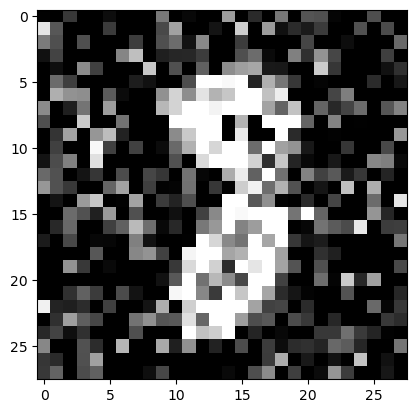

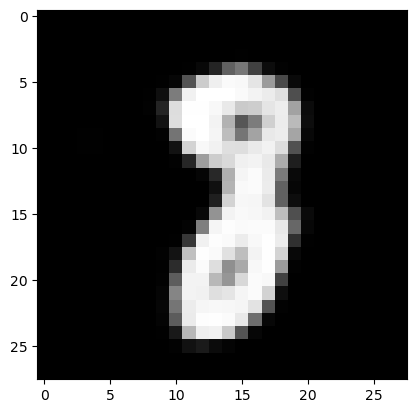

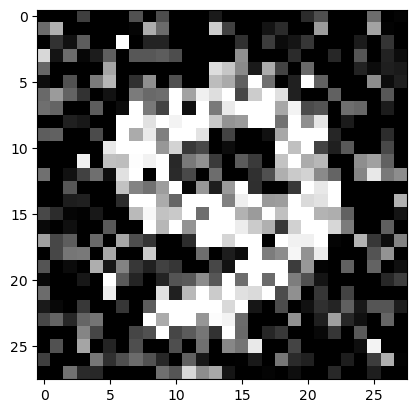

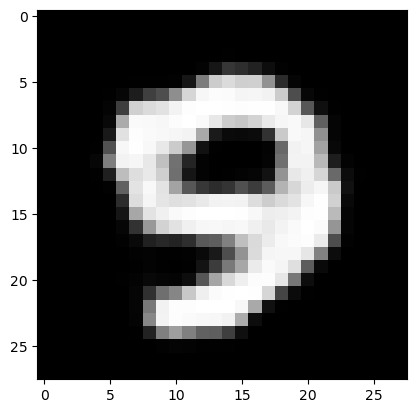

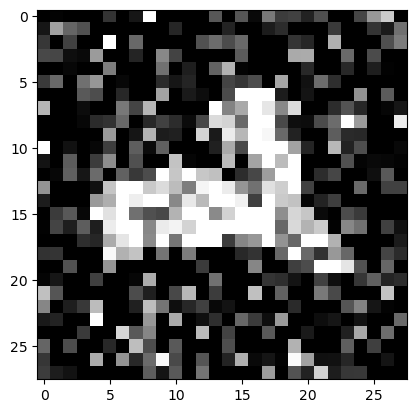

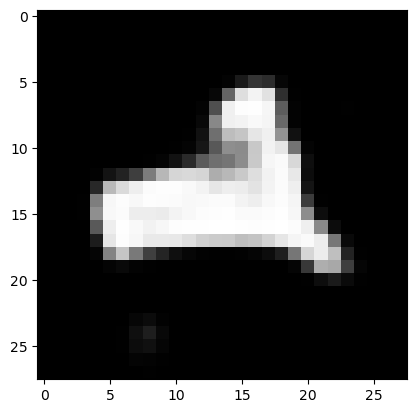

In [9]:
for i in range(10):
    random_int = random.randrange(9999)
    imgplot = plt.imshow(noisy_X_test[random_int,:,:])
    plt.show()
    imgplot = plt.imshow(X_predict[random_int,:,:])
    plt.show()